# 5. Retrieve data
## Dependencies and preparation
#### Data Sources
* Hotel occupancy by state
* Hotel occupancy by selected cities

#### Key learnings
* Defining the business scenario, and finding the appropriated data sources is the top challenge

In [1]:
# Dependencies
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import csv as csv
import time
import json
import locale
from locale import atof
from scipy.stats import linregress

# Google developer API key
from config_google import gkey

# Import API key
from config1 import api_key

In [2]:
# Reference the file where the CSV is located
# Explain the datasets
file_project1 = "Resources/DATA_PROYECTO_11.csv"
file_project2 = "Resources/cuartos_entidad_federativa.csv"

# Import the data into a Pandas DataFrame
centros_turisticos_df = pd.read_csv(file_project1, encoding = "utf8")
cuartos_entidad_df = pd.read_csv(file_project2, encoding = "utf8")

## Data Exploration
#### Data Sources
* Hotel occupancy by state
* Hotel occupancy by selected cities

#### Key learnings
* Defining the business scenario, and finding the appropriated data sources is the top challenge

In [3]:
cuartos_entidad_df.head()

,Entidad_federativa,cuartos_disponibles,cuartos_ocupados,% cuartos_disponibles,% cuartos_ocupados
0,AGUASCALIENTES,3.527919e+07,16521731.31,0.850641,0.771575
1,BAJA CALIFORNIA,1.424678e+08,62967381.59,3.435139,2.940617
2,BAJA CALIFORNIA SUR,1.186133e+08,67464489.26,2.859966,3.150635
3,CAMPECHE,4.603754e+07,23299487.90,1.110043,1.088101
4,CHIAPAS,1.223086e+08,48199261.06,2.949067,2.250937


In [4]:
#Describe data frame
centros_turisticos_df.head()

,Ciudades,Entidad_federativa,cuartos_disponibles_2018,cuartos_ocupados_2018,cuartos_disponibles_2019,cuartos_ocupados_2019,ocupacion_2019,cuartos_disponibles_2020,cuartos_ocupados_2020,ocupacion_2020,Aeropuerto_mas_cercano_codigo_IATA,Llegadas_nacionales_aeropuerto_abril_2019,Llegadas_internacionales_aeropuerto_abril_2019,Llegadas_nacionales_aeropuerto_abril_2020,Llegadas_internacionales_aeropuerto_abril_2020
0,SANTA MARIA DE HUATULCO,OAXACA,3722.0,2723.0,4240.0,3519.0,82.99,4320.0,0.0,0.0,HUX,34061.0,3889.0,491.0,1.0
1,CANCUN,QUINTANA ROO,35038.0,28826.0,35266.0,29091.0,82.49,35132.0,151.0,0.0,CUN,383545.0,720079.0,19779.0,1677.0
2,IXTAPA ZIHUATANEJO,GUERRERO,6271.0,4101.0,6282.0,3272.0,52.08,NaN,NaN,NaN,ZIH,17818.0,7560.0,827.0,45.0
3,LORETO,BAJA CALIFORNIA SUR,892.0,513.0,896.0,724.0,80.82,NaN,NaN,NaN,LTO,782.0,3914.0,23.0,17.0
4,CABO SAN LUCAS,BAJA CALIFORNIA SUR,11280.0,8400.0,11641.0,8982.0,77.16,13404.0,33.0,0.2,SDJ,81840.0,161595.0,5636.0,549.0


# 6. Assemble and Clean
## Data cleansing

In [5]:
#Identify missing values
centros_turisticos_df.count()

Ciudades                                          66
Entidad_federativa                                66
cuartos_disponibles_2018                          65
cuartos_ocupados_2018                             65
cuartos_disponibles_2019                          64
cuartos_ocupados_2019                             64
ocupacion_2019                                    64
cuartos_disponibles_2020                          60
cuartos_ocupados_2020                             60
ocupacion_2020                                    60
Aeropuerto_mas_cercano_codigo_IATA                66
Llegadas_nacionales_aeropuerto_abril_2019         63
Llegadas_internacionales_aeropuerto_abril_2019    63
Llegadas_nacionales_aeropuerto_abril_2020         63
Llegadas_internacionales_aeropuerto_abril_2020    63
dtype: int64

In [6]:
centros_turisticos_df.notnull()

,Ciudades,Entidad_federativa,cuartos_disponibles_2018,cuartos_ocupados_2018,cuartos_disponibles_2019,cuartos_ocupados_2019,ocupacion_2019,cuartos_disponibles_2020,cuartos_ocupados_2020,ocupacion_2020,Aeropuerto_mas_cercano_codigo_IATA,Llegadas_nacionales_aeropuerto_abril_2019,Llegadas_internacionales_aeropuerto_abril_2019,Llegadas_nacionales_aeropuerto_abril_2020,Llegadas_internacionales_aeropuerto_abril_2020
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,False,False,False,True,True,True,True,True
3,True,True,True,True,True,True,True,False,False,False,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
62,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
63,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False
64,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [7]:
# Drop all rows with missing information
centros_turisticos_df_clean = centros_turisticos_df.dropna(how='any')

In [8]:
centros_turisticos_df_clean.count()

Ciudades                                          56
Entidad_federativa                                56
cuartos_disponibles_2018                          56
cuartos_ocupados_2018                             56
cuartos_disponibles_2019                          56
cuartos_ocupados_2019                             56
ocupacion_2019                                    56
cuartos_disponibles_2020                          56
cuartos_ocupados_2020                             56
ocupacion_2020                                    56
Aeropuerto_mas_cercano_codigo_IATA                56
Llegadas_nacionales_aeropuerto_abril_2019         56
Llegadas_internacionales_aeropuerto_abril_2019    56
Llegadas_nacionales_aeropuerto_abril_2020         56
Llegadas_internacionales_aeropuerto_abril_2020    56
dtype: int64

In [9]:
#Validate if room capacity data frame has null values
cuartos_entidad_df.count()

Entidad_federativa        32
cuartos_disponibles       32
cuartos_ocupados          32
% cuartos_disponibles     32
% cuartos_ocupados        32
dtype: int64

In [10]:
#Validate dtypes
cuartos_entidad_df.dtypes

Entidad_federativa         object
cuartos_disponibles       float64
cuartos_ocupados          float64
% cuartos_disponibles     float64
% cuartos_ocupados        float64
dtype: object

In [11]:
#Validate dtypes
centros_turisticos_df_clean.dtypes

Ciudades                                           object
Entidad_federativa                                 object
cuartos_disponibles_2018                          float64
cuartos_ocupados_2018                             float64
cuartos_disponibles_2019                          float64
cuartos_ocupados_2019                             float64
ocupacion_2019                                    float64
cuartos_disponibles_2020                          float64
cuartos_ocupados_2020                             float64
ocupacion_2020                                    float64
Aeropuerto_mas_cercano_codigo_IATA                 object
Llegadas_nacionales_aeropuerto_abril_2019         float64
Llegadas_internacionales_aeropuerto_abril_2019    float64
Llegadas_nacionales_aeropuerto_abril_2020         float64
Llegadas_internacionales_aeropuerto_abril_2020    float64
dtype: object

## Prepare the dataframe

In [12]:
centros_turisticos_df_clean.sort_values("Ciudades")

,Ciudades,Entidad_federativa,cuartos_disponibles_2018,cuartos_ocupados_2018,cuartos_disponibles_2019,cuartos_ocupados_2019,ocupacion_2019,cuartos_disponibles_2020,cuartos_ocupados_2020,ocupacion_2020,Aeropuerto_mas_cercano_codigo_IATA,Llegadas_nacionales_aeropuerto_abril_2019,Llegadas_internacionales_aeropuerto_abril_2019,Llegadas_nacionales_aeropuerto_abril_2020,Llegadas_internacionales_aeropuerto_abril_2020
6,ACAPULCO,GUERRERO,19110.0,10077.0,19058.0,14795.0,77.63,19057.0,170.0,1.0,ACA,39215.0,779.0,2938.0,9.0
24,AGUASCALIENTES,AGUASCALIENTES,4570.0,2896.0,5301.0,3662.0,69.09,5220.0,408.0,8.0,AGU,28375.0,6592.0,1392.0,731.0
15,AKUMAL,QUINTANA ROO,4478.0,3819.0,4467.0,4006.0,89.70,4608.0,0.0,0.0,CUN,383545.0,720079.0,19779.0,1677.0
12,BOCA DEL RIO,VERACRUZ,8670.0,4789.0,8768.0,5615.0,64.04,7311.0,294.0,4.0,VER,59219.0,1431.0,8223.0,0.0
4,CABO SAN LUCAS,BAJA CALIFORNIA SUR,11280.0,8400.0,11641.0,8982.0,77.16,13404.0,33.0,0.2,SDJ,81840.0,161595.0,5636.0,549.0
25,CAMPECHE,CAMPECHE,1412.0,820.0,1415.0,807.0,57.01,1395.0,49.0,4.0,CPE,6074.0,0.0,423.0,0.0
1,CANCUN,QUINTANA ROO,35038.0,28826.0,35266.0,29091.0,82.49,35132.0,151.0,0.0,CUN,383545.0,720079.0,19779.0,1677.0
26,CELAYA,GUANAJUATO,2327.0,1074.0,3208.0,1060.0,33.03,3278.0,415.0,13.0,QRO,31422.0,13312.0,502.0,522.0
27,CHIHUAHUA,CHIHUAHUA,3953.0,1939.0,3943.0,1877.0,47.60,4880.0,286.0,6.0,CUU,64667.0,3881.0,3984.0,193.0
21,CIUDAD DE MEXICO,CIUDAD DE MEXICO,51924.0,34083.0,51208.0,28666.0,55.98,51638.0,692.0,1.0,MEX,1344336.0,691402.0,134526.0,22895.0


In [13]:
cuartos_entidad_df.head()

,Entidad_federativa,cuartos_disponibles,cuartos_ocupados,% cuartos_disponibles,% cuartos_ocupados
0,AGUASCALIENTES,3.527919e+07,16521731.31,0.850641,0.771575
1,BAJA CALIFORNIA,1.424678e+08,62967381.59,3.435139,2.940617
2,BAJA CALIFORNIA SUR,1.186133e+08,67464489.26,2.859966,3.150635
3,CAMPECHE,4.603754e+07,23299487.90,1.110043,1.088101
4,CHIAPAS,1.223086e+08,48199261.06,2.949067,2.250937


In [14]:
capacity_room_df = pd.merge(centros_turisticos_df_clean, cuartos_entidad_df, on="Entidad_federativa", how="outer")

In [15]:
capacity_room_df.count()

Ciudades                                          56
Entidad_federativa                                62
cuartos_disponibles_2018                          56
cuartos_ocupados_2018                             56
cuartos_disponibles_2019                          56
cuartos_ocupados_2019                             56
ocupacion_2019                                    56
cuartos_disponibles_2020                          56
cuartos_ocupados_2020                             56
ocupacion_2020                                    56
Aeropuerto_mas_cercano_codigo_IATA                56
Llegadas_nacionales_aeropuerto_abril_2019         56
Llegadas_internacionales_aeropuerto_abril_2019    56
Llegadas_nacionales_aeropuerto_abril_2020         56
Llegadas_internacionales_aeropuerto_abril_2020    56
cuartos_disponibles                               61
cuartos_ocupados                                  61
% cuartos_disponibles                             61
% cuartos_ocupados                            

In [16]:
capacity_room_df = capacity_room_df.dropna(how='any')

In [17]:
capacity_room_df.count()

Ciudades                                          55
Entidad_federativa                                55
cuartos_disponibles_2018                          55
cuartos_ocupados_2018                             55
cuartos_disponibles_2019                          55
cuartos_ocupados_2019                             55
ocupacion_2019                                    55
cuartos_disponibles_2020                          55
cuartos_ocupados_2020                             55
ocupacion_2020                                    55
Aeropuerto_mas_cercano_codigo_IATA                55
Llegadas_nacionales_aeropuerto_abril_2019         55
Llegadas_internacionales_aeropuerto_abril_2019    55
Llegadas_nacionales_aeropuerto_abril_2020         55
Llegadas_internacionales_aeropuerto_abril_2020    55
cuartos_disponibles                               55
cuartos_ocupados                                  55
% cuartos_disponibles                             55
% cuartos_ocupados                            

In [18]:
capacity_room_df.dtypes

Ciudades                                           object
Entidad_federativa                                 object
cuartos_disponibles_2018                          float64
cuartos_ocupados_2018                             float64
cuartos_disponibles_2019                          float64
cuartos_ocupados_2019                             float64
ocupacion_2019                                    float64
cuartos_disponibles_2020                          float64
cuartos_ocupados_2020                             float64
ocupacion_2020                                    float64
Aeropuerto_mas_cercano_codigo_IATA                 object
Llegadas_nacionales_aeropuerto_abril_2019         float64
Llegadas_internacionales_aeropuerto_abril_2019    float64
Llegadas_nacionales_aeropuerto_abril_2020         float64
Llegadas_internacionales_aeropuerto_abril_2020    float64
cuartos_disponibles                               float64
cuartos_ocupados                                  float64
% cuartos_disp

In [19]:
#Describe data frame
capacity_room_df.describe()

,cuartos_disponibles_2018,cuartos_ocupados_2018,cuartos_disponibles_2019,cuartos_ocupados_2019,ocupacion_2019,cuartos_disponibles_2020,cuartos_ocupados_2020,ocupacion_2020,Llegadas_nacionales_aeropuerto_abril_2019,Llegadas_internacionales_aeropuerto_abril_2019,Llegadas_nacionales_aeropuerto_abril_2020,Llegadas_internacionales_aeropuerto_abril_2020,cuartos_disponibles,cuartos_ocupados,% cuartos_disponibles,% cuartos_ocupados
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,5.500000e+01,55.000000,55.000000,55.000000,5.500000e+01,5.500000e+01,55.000000,55.000000
mean,6187.072727,4022.472727,6350.545455,4197.800000,60.233091,6486.181818,184.018182,4.100000,1.945778e+05,121464.018182,18421.672727,2335.018182,1.830872e+08,9.869970e+07,4.414540,4.609340
std,8733.219747,6327.112389,8787.983015,5996.514631,16.147696,8846.672612,258.618015,3.902848,3.506154e+05,246966.392739,36136.789252,6099.775295,1.507521e+08,1.065366e+08,3.634887,4.975327
min,288.000000,121.000000,283.000000,147.000000,24.770000,316.000000,0.000000,0.000000,5.980000e+02,0.000000,0.000000,0.000000,1.756730e+07,6.537926e+06,0.423577,0.305325
25%,1828.000000,844.000000,1838.000000,884.000000,47.270000,1825.500000,26.000000,1.000000,2.881450e+04,903.000000,1184.000000,0.000000,1.044488e+08,4.819926e+07,2.518437,2.250937
50%,3676.000000,1593.000000,3676.000000,1965.000000,62.660000,3582.000000,91.000000,3.000000,5.921900e+04,4633.000000,4636.000000,193.000000,1.281454e+08,5.931149e+07,3.089802,2.769885
75%,5783.000000,3697.500000,6257.500000,4035.500000,71.175000,6596.000000,281.500000,6.500000,8.405700e+04,37774.000000,8223.000000,999.000000,2.393741e+08,1.047378e+08,5.771712,4.891325
max,51924.000000,34083.000000,51208.000000,29091.000000,89.700000,51638.000000,1519.000000,13.000000,1.344336e+06,720079.000000,134526.000000,22895.000000,5.591391e+08,3.970372e+08,13.481785,18.541892


In [20]:
#The total number of rooms in the country are:
# Include reference hhtp://
print("The total number of rooms in the country are: 4147367016")

The total number of rooms in the country are: 4147367016


## Smart index calculation of unemployment rate

In [21]:
# Adding the employment variable
capacity_room_df["Porcentaje_por_ciudad_cuartos_disp_18"] = ((capacity_room_df["cuartos_disponibles_2018"])/(4147367016))*100
capacity_room_df["Porcentaje_por_ciudad_cuartos_ocup_18"]= ((capacity_room_df["cuartos_ocupados_2018"])/(2141298092))*100
capacity_room_df["Empleos_por_ciudad_2018"]= ((capacity_room_df["Porcentaje_por_ciudad_cuartos_disp_18"]).astype(float))*4129760
capacity_room_df["Empleos_por_ciudad_2019"]= ((capacity_room_df["Porcentaje_por_ciudad_cuartos_disp_18"]).astype(float))*4308490
capacity_room_df["Empleos_por_ciudad_2020"]= ((capacity_room_df["Porcentaje_por_ciudad_cuartos_disp_18"]).astype(float))*4487790


capacity_room_df["Empleos_por_ciudad_ocup_2018"]= (((capacity_room_df["Porcentaje_por_ciudad_cuartos_ocup_18"]).astype(float))*4129760*(capacity_room_df["cuartos_ocupados_2018"]))/3
capacity_room_df["Empleos_por_ciudad_ocup_2019"]= (((capacity_room_df["Porcentaje_por_ciudad_cuartos_ocup_18"]).astype(float))*4308490*(capacity_room_df["cuartos_ocupados_2019"]))/3
capacity_room_df["Empleos_por_ciudad_ocup_2020"]= (((capacity_room_df["Porcentaje_por_ciudad_cuartos_ocup_18"]).astype(float))*4487790*(capacity_room_df["cuartos_ocupados_2020"]))/3

#Indice de desempleo de acuerdo a ocupación de cuartos
capacity_room_df["Indice_de_desempleo"]= (100 - ((capacity_room_df["Empleos_por_ciudad_ocup_2020"]/capacity_room_df["Empleos_por_ciudad_ocup_2019"])*100))/100

In [22]:
capacity_room_df

,Ciudades,Entidad_federativa,cuartos_disponibles_2018,cuartos_ocupados_2018,cuartos_disponibles_2019,cuartos_ocupados_2019,ocupacion_2019,cuartos_disponibles_2020,cuartos_ocupados_2020,ocupacion_2020,...,% cuartos_ocupados,Porcentaje_por_ciudad_cuartos_disp_18,Porcentaje_por_ciudad_cuartos_ocup_18,Empleos_por_ciudad_2018,Empleos_por_ciudad_2019,Empleos_por_ciudad_2020,Empleos_por_ciudad_ocup_2018,Empleos_por_ciudad_ocup_2019,Empleos_por_ciudad_ocup_2020,Indice_de_desempleo
0,SANTA MARIA DE HUATULCO,OAXACA,3722.0,2723.0,4240.0,3519.0,82.99,4320.0,0.0,0.0,...,2.346155,0.000090,0.000127,370.619881,386.659770,402.750813,4.766743e+05,6.426783e+05,0.000000e+00,1.000000
1,PUERTO ESCONDIDO,OAXACA,2344.0,1032.0,2442.0,1641.0,67.18,2524.0,8.0,0.0,...,2.346155,0.000057,0.000048,233.404890,243.506314,253.639953,6.846771e+04,1.135834e+05,5.767715e+02,0.994922
2,OAXACA,OAXACA,5700.0,3010.0,5894.0,4035.0,68.46,6205.0,41.0,1.0,...,2.346155,0.000137,0.000141,567.580152,592.144194,616.786576,5.824510e+05,8.145856e+05,8.621533e+03,0.989416
3,CANCUN,QUINTANA ROO,35038.0,28826.0,35266.0,29091.0,82.49,35132.0,151.0,0.0,...,18.541892,0.000845,0.001346,3488.925150,3639.920751,3791.397902,5.341893e+07,5.624316e+07,3.040853e+05,0.994593
4,COZUMEL,QUINTANA ROO,4670.0,3409.0,4667.0,3007.0,64.43,5158.0,26.0,1.0,...,18.541892,0.000113,0.000159,465.017423,485.142700,505.332159,7.471029e+05,6.875228e+05,6.192051e+03,0.990994
5,ISLA MUJERES,QUINTANA ROO,1668.0,1198.0,1646.0,1104.0,67.08,1262.0,6.0,0.0,...,18.541892,0.000040,0.000056,166.091876,173.280091,180.491230,9.226565e+04,8.870592e+04,5.021601e+02,0.994339
6,AKUMAL,QUINTANA ROO,4478.0,3819.0,4467.0,4006.0,89.70,4608.0,0.0,0.0,...,18.541892,0.000108,0.000178,445.898933,465.196790,484.556191,9.376176e+05,1.026094e+06,0.000000e+00,1.000000
7,PLAYA DEL CARMEN,QUINTANA ROO,17335.0,14605.0,17332.0,14629.0,84.40,17712.0,44.0,0.2,...,18.541892,0.000418,0.000682,1726.140689,1800.845545,1875.788647,1.371291e+07,1.432989e+07,4.489401e+04,0.996867
8,CABO SAN LUCAS,BAJA CALIFORNIA SUR,11280.0,8400.0,11641.0,8982.0,77.16,13404.0,33.0,0.2,...,3.150635,0.000272,0.000392,1123.211248,1171.822195,1220.588171,4.536125e+06,5.060332e+06,1.936544e+04,0.996173
9,SAN JOSE DEL CABO,BAJA CALIFORNIA SUR,4492.0,3510.0,4497.0,3207.0,71.30,4873.0,7.0,0.1,...,3.150635,0.000108,0.000164,447.292990,466.651179,486.071105,7.920282e+05,7.549754e+05,1.716482e+03,0.997726


In [24]:
NEW1=capacity_room_df.set_index('Ciudades')
NEW2=NEW1.drop(index='MANZANILLO')
NEW3=NEW2.drop(index='SALAMANCA')
NEW4=NEW3.drop(index='SANTA MARIA DE HUATULCO')
NEW4= NEW4.reset_index()
capacity_room_df=NEW4

In [25]:
capacity_room_df.count()

Ciudades                                          52
Entidad_federativa                                52
cuartos_disponibles_2018                          52
cuartos_ocupados_2018                             52
cuartos_disponibles_2019                          52
cuartos_ocupados_2019                             52
ocupacion_2019                                    52
cuartos_disponibles_2020                          52
cuartos_ocupados_2020                             52
ocupacion_2020                                    52
Aeropuerto_mas_cercano_codigo_IATA                52
Llegadas_nacionales_aeropuerto_abril_2019         52
Llegadas_internacionales_aeropuerto_abril_2019    52
Llegadas_nacionales_aeropuerto_abril_2020         52
Llegadas_internacionales_aeropuerto_abril_2020    52
cuartos_disponibles                               52
cuartos_ocupados                                  52
% cuartos_disponibles                             52
% cuartos_ocupados                            

### Perform API Calls
* Perform a Latitute and Longitud check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [26]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

In [77]:
# Use Openweather api to get the weather data needed from those cities.
name = []
lat = []
lon = []
country = []

# Build query URL
print("-----------------------")
print("START PROCESSING DATA")
print("-----------------------")

for ciudad in capacity_room_df["Ciudades"]:
    query_url = url + "appid=" + api_key + "&q=" + ciudad + "&units=imperial"
    response = requests.get(query_url)
    if response.status_code == 200:
        response = response.json()
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        country.append(response["sys"]["country"])
        name.append(response["name"])
        #print log of each city as it'sbeing processed (with the city number and city name
        #print(f"Processing record for CITY: " + ciudad, " Where query_url is: " + query_url)
print("-----------------------")
print("END PROCESSING DATA")
print("-----------------------")

-----------------------
START PROCESSING DATA
-----------------------
-----------------------
END PROCESSING DATA
-----------------------


In [28]:
cities_df = pd.DataFrame({"City": name,
                        "Latitude": lat, 
                        "Longitude": lon,
                        "Country": country
                       })
cities_df.count()

City         52
Latitude     52
Longitude    52
Country      52
dtype: int64

In [29]:
cities_df

,City,Latitude,Longitude,Country
0,Puerto Escondido,15.85,-97.07,MX
1,Oaxaca City,17.05,-96.72,MX
2,Cancún,21.17,-86.85,MX
3,San Miguel de Cozumel,20.51,-86.95,MX
4,Isla Mujeres,21.23,-86.73,MX
5,Akumal,20.40,-87.31,MX
6,Playa del Carmen,20.63,-87.08,MX
7,Cabo San Lucas,22.89,-109.91,MX
8,San José del Cabo,23.06,-109.70,MX
9,Acapulco de Juárez,16.86,-99.89,MX


In [30]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv
cities_df.to_csv("Resources/cities_fix2.csv", index = False)

## Geo Places

In [32]:
# Store into variable named hotels_df
hotels_df = []
city_list = []
lat_list=[]
long_list=[]

# Add a "Hotel Name" column to the DataFrame.
for city in range(len(cities_df["City"])):

    lat = cities_df.loc[city]["Latitude"]
    lng = cities_df.loc[city]["Longitude"]

    city_coords = f"{lat},{lng}"

    params = {
        "location": city_coords, 
        "types": "lodging",
        "radius": 50000, #Set parameters to search for hotels with 5000 meters.
        "key": gkey
    }

    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"   
    
    hotel_request = requests.get(base_url, params=params)
    hotel_response = hotel_request.json()

    for subcity in range(len(hotel_response["results"])):
        try:
            hotels_df.append(hotel_response["results"][subcity]["name"])
            city_list.append(cities_df.iloc[city]["City"])
            lat_list.append(hotel_response["results"][subcity]["geometry"]["location"]["lat"])
            long_list.append(hotel_response["results"][subcity]["geometry"]["location"]["lng"])
        except:
            hotels_df.append("Hotel not found")

#hotels_by_city_0 = pd.DataFrame(zip(city_list,hotels_df))
hotels_by_city = pd.DataFrame(zip(city_list,hotels_df,lat_list,long_list))

In [33]:
hotels_by_city.count()

0    1040
1    1040
2    1040
3    1040
dtype: int64

In [34]:
hotels_by_city.head()

,0,1,2,3
0,Puerto Escondido,Aldea del Bazar Hotel and Spa,15.867182,-97.086004
1,Puerto Escondido,Hotel Suites Villasol,15.865553,-97.084919
2,Puerto Escondido,Posada Real Puerto Escondido,15.864495,-97.085912
3,Puerto Escondido,Suites La Hacienda,15.863758,-97.079367
4,Puerto Escondido,Hotel Santa Fe,15.857970,-97.058675


In [35]:
hotels_by_city.columns = ["Ciudades", "HOTEL","LATITUDE","LONGITUDE"]

In [36]:
hotels_by_city.head()

,Ciudades,HOTEL,LATITUDE,LONGITUDE
0,Puerto Escondido,Aldea del Bazar Hotel and Spa,15.867182,-97.086004
1,Puerto Escondido,Hotel Suites Villasol,15.865553,-97.084919
2,Puerto Escondido,Posada Real Puerto Escondido,15.864495,-97.085912
3,Puerto Escondido,Suites La Hacienda,15.863758,-97.079367
4,Puerto Escondido,Hotel Santa Fe,15.857970,-97.058675


In [37]:
hotels_by_city["Ciudades"] = hotels_by_city["Ciudades"].str.upper() 

In [38]:
hotels_by_city.head()

,Ciudades,HOTEL,LATITUDE,LONGITUDE
0,PUERTO ESCONDIDO,Aldea del Bazar Hotel and Spa,15.867182,-97.086004
1,PUERTO ESCONDIDO,Hotel Suites Villasol,15.865553,-97.084919
2,PUERTO ESCONDIDO,Posada Real Puerto Escondido,15.864495,-97.085912
3,PUERTO ESCONDIDO,Suites La Hacienda,15.863758,-97.079367
4,PUERTO ESCONDIDO,Hotel Santa Fe,15.857970,-97.058675


In [39]:
hotels_by_city.count()

Ciudades     1040
HOTEL        1040
LATITUDE     1040
LONGITUDE    1040
dtype: int64

In [40]:
#Capacity Room
capacity_room_df.count()

Ciudades                                          52
Entidad_federativa                                52
cuartos_disponibles_2018                          52
cuartos_ocupados_2018                             52
cuartos_disponibles_2019                          52
cuartos_ocupados_2019                             52
ocupacion_2019                                    52
cuartos_disponibles_2020                          52
cuartos_ocupados_2020                             52
ocupacion_2020                                    52
Aeropuerto_mas_cercano_codigo_IATA                52
Llegadas_nacionales_aeropuerto_abril_2019         52
Llegadas_internacionales_aeropuerto_abril_2019    52
Llegadas_nacionales_aeropuerto_abril_2020         52
Llegadas_internacionales_aeropuerto_abril_2020    52
cuartos_disponibles                               52
cuartos_ocupados                                  52
% cuartos_disponibles                             52
% cuartos_ocupados                            

In [41]:
#Set index for Ciudades
capacity_room_df.set_index("Ciudades")

,Entidad_federativa,cuartos_disponibles_2018,cuartos_ocupados_2018,cuartos_disponibles_2019,cuartos_ocupados_2019,ocupacion_2019,cuartos_disponibles_2020,cuartos_ocupados_2020,ocupacion_2020,Aeropuerto_mas_cercano_codigo_IATA,...,% cuartos_ocupados,Porcentaje_por_ciudad_cuartos_disp_18,Porcentaje_por_ciudad_cuartos_ocup_18,Empleos_por_ciudad_2018,Empleos_por_ciudad_2019,Empleos_por_ciudad_2020,Empleos_por_ciudad_ocup_2018,Empleos_por_ciudad_ocup_2019,Empleos_por_ciudad_ocup_2020,Indice_de_desempleo
Ciudades,,,,,,,,,,,,,,,,,,,,,
PUERTO ESCONDIDO,OAXACA,2344.0,1032.0,2442.0,1641.0,67.18,2524.0,8.0,0.0,PXM,...,2.346155,0.000057,0.000048,233.404890,243.506314,253.639953,6.846771e+04,1.135834e+05,5.767715e+02,0.994922
OAXACA,OAXACA,5700.0,3010.0,5894.0,4035.0,68.46,6205.0,41.0,1.0,OAX,...,2.346155,0.000137,0.000141,567.580152,592.144194,616.786576,5.824510e+05,8.145856e+05,8.621533e+03,0.989416
CANCUN,QUINTANA ROO,35038.0,28826.0,35266.0,29091.0,82.49,35132.0,151.0,0.0,CUN,...,18.541892,0.000845,0.001346,3488.925150,3639.920751,3791.397902,5.341893e+07,5.624316e+07,3.040853e+05,0.994593
COZUMEL,QUINTANA ROO,4670.0,3409.0,4667.0,3007.0,64.43,5158.0,26.0,1.0,CZM,...,18.541892,0.000113,0.000159,465.017423,485.142700,505.332159,7.471029e+05,6.875228e+05,6.192051e+03,0.990994
ISLA MUJERES,QUINTANA ROO,1668.0,1198.0,1646.0,1104.0,67.08,1262.0,6.0,0.0,CUN,...,18.541892,0.000040,0.000056,166.091876,173.280091,180.491230,9.226565e+04,8.870592e+04,5.021601e+02,0.994339
AKUMAL,QUINTANA ROO,4478.0,3819.0,4467.0,4006.0,89.70,4608.0,0.0,0.0,CUN,...,18.541892,0.000108,0.000178,445.898933,465.196790,484.556191,9.376176e+05,1.026094e+06,0.000000e+00,1.000000
PLAYA DEL CARMEN,QUINTANA ROO,17335.0,14605.0,17332.0,14629.0,84.40,17712.0,44.0,0.2,CUN,...,18.541892,0.000418,0.000682,1726.140689,1800.845545,1875.788647,1.371291e+07,1.432989e+07,4.489401e+04,0.996867
CABO SAN LUCAS,BAJA CALIFORNIA SUR,11280.0,8400.0,11641.0,8982.0,77.16,13404.0,33.0,0.2,SDJ,...,3.150635,0.000272,0.000392,1123.211248,1171.822195,1220.588171,4.536125e+06,5.060332e+06,1.936544e+04,0.996173
SAN JOSE DEL CABO,BAJA CALIFORNIA SUR,4492.0,3510.0,4497.0,3207.0,71.30,4873.0,7.0,0.1,SDJ,...,3.150635,0.000108,0.000164,447.292990,466.651179,486.071105,7.920282e+05,7.549754e+05,1.716482e+03,0.997726


In [42]:
array01 = hotels_by_city.Ciudades.unique()
array01.sort()
array01

array(['ACAPULCO DE JUÁREZ', 'AGUASCALIENTES', 'AKUMAL', 'BOCA DEL RIO',
       'CABO SAN LUCAS', 'CAMPECHE', 'CANCÚN', 'CELAYA', 'CHIHUAHUA',
       'CIUDAD JUÁREZ', 'COATZACOALCOS', 'COLIMA', 'COMITÁN', 'DURANGO',
       'EL FUERTE', 'GUADALAJARA', 'GUANAJUATO CITY', 'HERMOSILLO',
       'IRAPUATO', 'ISLA MUJERES', 'LEÓN', 'MAZATLÁN', 'MEXICALI',
       'MEXICO CITY', 'MONTERREY', 'NUEVO VALLARTA', 'OAXACA CITY',
       'PALENQUE/TEMP', 'PLAYA DEL CARMEN', 'PUEBLA', 'PUERTO ESCONDIDO',
       'PUERTO VALLARTA', 'QUERÉTARO', 'ROSARITO',
       'SAN CRISTÓBAL DE LAS CASAS', 'SAN JOSÉ DEL CABO',
       'SAN JUAN DE LOS LAGOS', 'SAN JUAN DEL RÍO', 'SAN LUIS POTOSÍ',
       'SAN MIGUEL DE ALLENDE', 'SAN MIGUEL DE COZUMEL', 'TAXCO',
       'TECATE', 'TEQUISQUIAPAN', 'TIJUANA', 'TLAXCALA', 'TONALÁ',
       'TUXTLA GUTIÉRREZ', 'VALLE DE BRAVO', 'VILLAHERMOSA', 'XALAPA',
       'ZACATECAS'], dtype=object)

In [43]:
array02 = capacity_room_df.Ciudades.unique()
array02.sort()
array02

array(['ACAPULCO', 'AGUASCALIENTES', 'AKUMAL', 'BOCA DEL RIO',
       'CABO SAN LUCAS', 'CAMPECHE', 'CANCUN', 'CELAYA', 'CHIHUAHUA',
       'CIUDAD DE MEXICO', 'CIUDAD JUAREZ', 'COATZACOALCOS', 'COLIMA',
       'COMITAN DE DOMINGUEZ', 'COZUMEL', 'DURANGO', 'EL FUERTE',
       'GUADALAJARA', 'GUANAJUATO', 'HERMOSILLO', 'IRAPUATO',
       'ISLA MUJERES', 'LEON', 'MAZATLAN', 'MEXICALI', 'MONTERREY',
       'NUEVO VALLARTA', 'OAXACA', 'PALENQUE', 'PLAYA DEL CARMEN',
       'PUEBLA', 'PUERTO ESCONDIDO', 'PUERTO VALLARTA', 'QUERETARO',
       'ROSARITO', 'SAN CRISTOBAL DE LAS CASAS', 'SAN JOSE DEL CABO',
       'SAN JUAN DE LOS LAGOS', 'SAN JUAN DEL RIO', 'SAN LUIS POTOSI',
       'SAN MIGUEL DE ALLENDE', 'TAXCO', 'TECATE', 'TEQUISQUIAPAN',
       'TIJUANA', 'TLAXCALA', 'TONALA', 'TUXTLA GUTIERREZ',
       'VALLE DE BRAVO', 'VILLAHERMOSA', 'XALAPA', 'ZACATECAS'],
      dtype=object)

In [44]:
light_map_cities = capacity_room_df[["Ciudades", "Indice_de_desempleo"]]
#light_map_cities

In [45]:
light_map_cities.loc[10, "Ciudades"] = "ACAPULCO DE JUÁREZ"
light_map_cities.loc[3, "Ciudades"] = "CANCÚN"
light_map_cities.loc[27, "Ciudades"] = "MEXICO CITY"
light_map_cities.loc[37, "Ciudades"] = "CIUDAD JUÁREZ"
light_map_cities.loc[38, "Ciudades"] = "COMITÁN"
light_map_cities.loc[37, "Ciudades"] = "CIUDAD JUÁREZ"
light_map_cities.loc[4, "Ciudades"] = "SAN MIGUEL DE COZUMEL"
light_map_cities.loc[32, "Ciudades"] = "GUANAJUATO CITY"
light_map_cities.loc[34, "Ciudades"] = "LEÓN"
light_map_cities.loc[13, "Ciudades"] = "MAZATLÁN"
light_map_cities.loc[2, "Ciudades"] = "OAXACA CITY"
light_map_cities.loc[39, "Ciudades"] = "PALENQUE/TEMP"
light_map_cities.loc[45, "Ciudades"] = "QUERÉTARO"
light_map_cities.loc[40, "Ciudades"] = "SAN CRISTÓBAL DE LAS CASAS"
light_map_cities.loc[9, "Ciudades"] = "SAN JOSÉ DEL CABO"
light_map_cities.loc[46, "Ciudades"] = "SAN JUAN DEL RÍO"
light_map_cities.loc[48, "Ciudades"] = "SAN LUIS POTOSÍ"
light_map_cities.loc[16, "Ciudades"] = "TONALÁ"
light_map_cities.loc[41, "Ciudades"] = "TUXTLA GUTIÉRREZ"
light_map_cities

C:\Users\raulflo\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Ciudades,Indice_de_desempleo
0,PUERTO ESCONDIDO,0.994922
1,OAXACA,0.989416
2,OAXACA CITY,0.994593
3,CANCÚN,0.990994
4,SAN MIGUEL DE COZUMEL,0.994339
5,AKUMAL,1.000000
6,PLAYA DEL CARMEN,0.996867
7,CABO SAN LUCAS,0.996173
8,SAN JOSE DEL CABO,0.997726
9,SAN JOSÉ DEL CABO,0.988031


In [47]:
heat_map_cities = pd.merge(hotels_by_city, light_map_cities, on="Ciudades", how="outer")

In [58]:
heat_map_cities = heat_map_cities.dropna(how='any')

In [69]:
heat_map_cities.head()

,Ciudades,HOTEL,LATITUDE,LONGITUDE,Indice_de_desempleo
0,PUERTO ESCONDIDO,Aldea del Bazar Hotel and Spa,15.867182,-97.086004,0.994922
1,PUERTO ESCONDIDO,Hotel Suites Villasol,15.865553,-97.084919,0.994922
2,PUERTO ESCONDIDO,Posada Real Puerto Escondido,15.864495,-97.085912,0.994922
3,PUERTO ESCONDIDO,Suites La Hacienda,15.863758,-97.079367,0.994922
4,PUERTO ESCONDIDO,Hotel Santa Fe,15.857970,-97.058675,0.994922


In [70]:
heat_map_cities.Ciudades.unique()

array(['PUERTO ESCONDIDO', 'OAXACA CITY', 'CANCÚN',
       'SAN MIGUEL DE COZUMEL', 'AKUMAL', 'PLAYA DEL CARMEN',
       'CABO SAN LUCAS', 'SAN JOSÉ DEL CABO', 'ACAPULCO DE JUÁREZ',
       'COLIMA', 'MAZATLÁN', 'PUERTO VALLARTA', 'TONALÁ',
       'SAN JUAN DE LOS LAGOS', 'BOCA DEL RIO', 'COATZACOALCOS', 'XALAPA',
       'NUEVO VALLARTA', 'ROSARITO', 'MEXICALI', 'TECATE', 'TIJUANA',
       'MEXICO CITY', 'AGUASCALIENTES', 'CAMPECHE', 'CELAYA',
       'GUANAJUATO CITY', 'LEÓN', 'CHIHUAHUA', 'CIUDAD JUÁREZ', 'COMITÁN',
       'PALENQUE/TEMP', 'SAN CRISTÓBAL DE LAS CASAS', 'TUXTLA GUTIÉRREZ',
       'HERMOSILLO', 'PUEBLA', 'QUERÉTARO', 'SAN JUAN DEL RÍO',
       'SAN LUIS POTOSÍ', 'VALLE DE BRAVO', 'VILLAHERMOSA', 'ZACATECAS'],
      dtype=object)

# 07. Analyze Trends
## Statistical Analysis - Holly Week

Text(0, 0.5, 'Cuartos Ocuapdos')

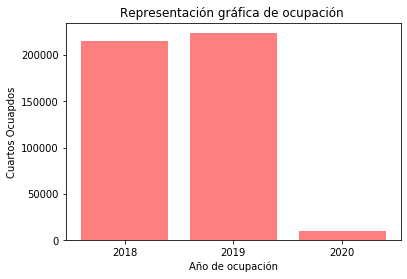

In [60]:
# How the hotel occupancy on the holly week is behaving over the last 3 years
# Reduction on hotel room occupancy
capacity_sum_2018 = capacity_room_df["cuartos_ocupados_2018"].sum()
capacity_sum_2019 = capacity_room_df["cuartos_ocupados_2019"].sum()
capacity_sum_2020 = capacity_room_df["cuartos_ocupados_2020" ].sum()
capacity_list = [capacity_sum_2018, capacity_sum_2019,capacity_sum_2020]
x_axis = np.arange(len(capacity_list))
plt.bar(x_axis, capacity_list, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["2018", "2019", "2020"])
plt.title("Representación gráfica de ocupación ")
plt.xlabel("Año de ocupación")
plt.ylabel("Cuartos Ocuapdos")

Text(0, 0.5, 'Tasa de desempleo')

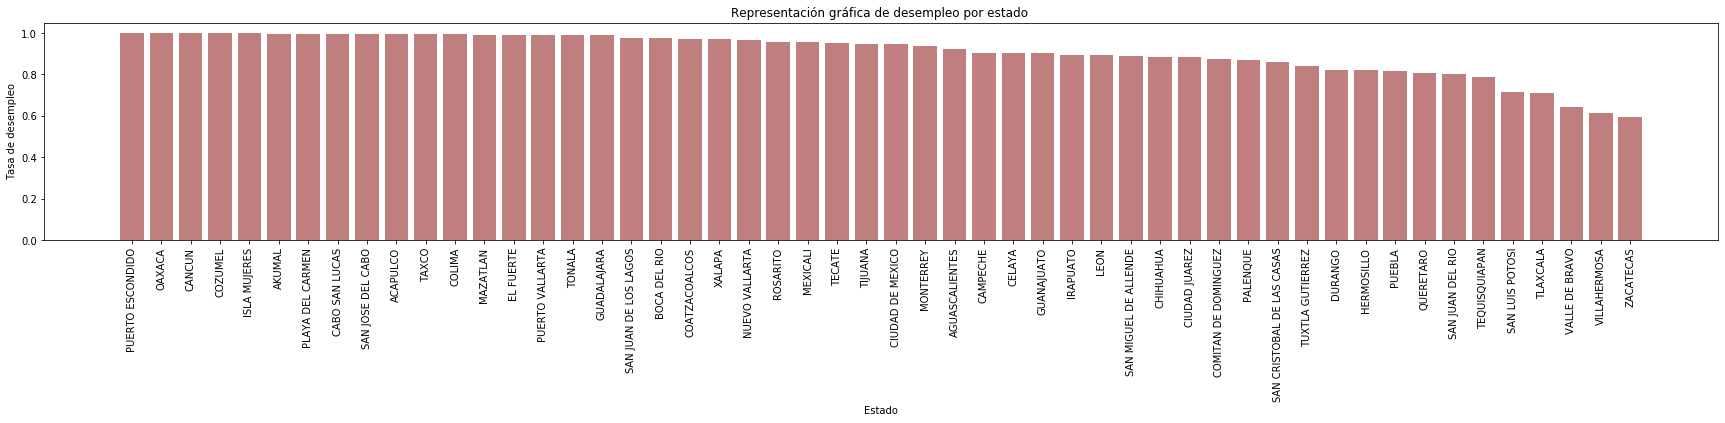

In [61]:
#Representación de desemplo por ciudad
capacity_list = capacity_room_df["Indice_de_desempleo"]
capacity_order = capacity_list.sort_values(ascending = False)
x_axis = np.arange(len(capacity_order))
plt.figure(figsize = (30,4))
plt.bar(x_axis, capacity_order, color='maroon', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, capacity_room_df["Ciudades"], rotation ="vertical")
plt.title("Representación gráfica de desempleo por estado ")
plt.xlabel("Estado")
plt.ylabel("Tasa de desempleo")

Text(0, 0.5, 'Vuelos')

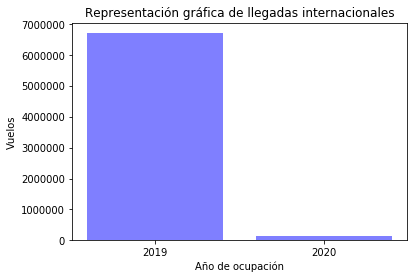

In [62]:
# Airport behave in international flights the last 2 years
# Reduction on flights
vuelos_2019 = centros_turisticos_df["Llegadas_internacionales_aeropuerto_abril_2019"].sum()
vuelos_2020 = centros_turisticos_df["Llegadas_internacionales_aeropuerto_abril_2020"].sum()
vuelos_list = [vuelos_2019, vuelos_2020]
x_axis = np.arange(len(vuelos_list))
plt.bar(x_axis, vuelos_list, color='b', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["2019", "2020"])
plt.title("Representación gráfica de llegadas internacionales")
plt.xlabel("Año de ocupación")
plt.ylabel("Vuelos")

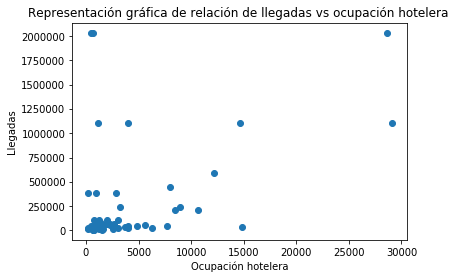

In [63]:
#Representación gráfica de relación de llegadas vs ocupación hotelera
sum_llegadas = capacity_room_df["Llegadas_internacionales_aeropuerto_abril_2019"] + capacity_room_df["Llegadas_nacionales_aeropuerto_abril_2019"]
x_values = capacity_room_df["cuartos_ocupados_2019"]
y_values = sum_llegadas
plt.scatter(x_values, y_values)
plt.xlabel('Ocupación hotelera')
plt.ylabel('Llegadas')
plt.title("Representación gráfica de relación de llegadas vs ocupación hotelera ")
plt.show()

## Hotel Heatmap
* Configure gmaps.
* Use the Lat and Lng as locations.
* Add Heatmap layer to map.

In [64]:
# Configure gmaps
gmaps.configure(api_key=gkey)

In [65]:
# Use the Lat and Lng as locations and ocupacion_2019 as the weight
locations = heat_map_cities[["LATITUDE", "LONGITUDE"]].astype(float)
indice_desempleo = heat_map_cities["Indice_de_desempleo"].astype(float)

### EXPLANATION: 

In [66]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=indice_desempleo, 
                                 dissipating=False, max_intensity=22,
                                 point_radius = 1.2)
# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [75]:
# NOTE: Do not change any of the code in this cell

# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{HOTEL}</dd>
<dt>City</dt><dd>{Ciudades}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
hotel_info = [info_box_template.format(**row) for index, row in heat_map_cities.iterrows()]
locations = heat_map_cities[["LATITUDE", "LONGITUDE"]]

In [76]:
# Add marker layer ontop of heat map
markers = gmaps.marker_layer(locations)
fig.add_layer(markers)

# Display Map
fig

Figure(layout=FigureLayout(height='420px'))

## WE FINISH!!!! UHUUUUU!!!